# Data Science - Team 15 (Group 4 INT-A)

# Iteration 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

## 1. Data Understanding

### 1.1 Analyzing and merging datasets

In [2]:
df1 = pd.read_csv('set15_it2_final.csv')

In [3]:
df2 = pd.read_csv('set15_it3.csv')

In [4]:
df1

,Unnamed: 0,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,4,Common,570.988693,True,1
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,8,Common,401.028848,True,1
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,5,Common,302.776780,True,1
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,6,Common,534.705131,True,1
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,6,Common,576.370119,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2333,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,5,Gleaming,704.664976,True,1
2334,2334,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,5,Common,802.057696,False,1
2335,2335,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,5,Common,853.618548,False,1
2336,2336,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,6,Common,496.129975,True,1


In [5]:
df2

,DI,Craftsmanship,EraConstructed
0,0,6,1201
1,1,7,1112
2,2,4,1338
3,3,5,1212
4,4,5,1042
...,...,...,...
2358,2335,7,1651
2359,2336,6,1519
2360,2337,5,1142
2361,2338,5,1257


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   DI              2363 non-null   int64
 1   Craftsmanship   2363 non-null   int64
 2   EraConstructed  2363 non-null   int64
dtypes: int64(3)
memory usage: 55.5 KB


In [7]:
df2.describe()

,DI,Craftsmanship,EraConstructed
count,2363.000000,2363.000000,2363.000000
mean,1169.813796,6.123572,1409.574270
std,675.447687,1.409403,231.862362
min,0.000000,1.000000,887.000000
25%,584.500000,5.000000,1225.500000
50%,1170.000000,6.000000,1396.000000
75%,1753.500000,7.000000,1617.500000
max,2339.000000,10.000000,1799.000000


In [8]:
df2.sample(5)

,DI,Craftsmanship,EraConstructed
1313,1301,7,1488
929,921,5,1132
393,390,7,1732
2010,1990,8,1512
1111,1101,8,1781


In [9]:
df = df1.merge(df2, left_index=True, right_index=True, how="left")

In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df.drop(columns=['DI_y'], inplace=True)

In [12]:
df.rename(columns={'DI_x' : 'DI'}, inplace=True)

In [13]:
df.sample(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction,Craftsmanship,EraConstructed
1085,1086,225000.0,GnomeBurough,Dreamweaver,1190.0,3072.0,5,Common,859.347532,False,1,4,1236
2328,2330,185000.0,Meadowlands,Sunspire,1028.0,8450.0,6,Common,706.574637,True,1,5,1399
164,164,148800.0,AetherIsles,Wyverncliff,847.0,5105.0,7,Common,568.315168,True,0,6,1164
741,742,184900.0,Meadowlands,Brightforge,1219.0,7632.0,5,Gleaming,706.192705,True,1,6,1785
118,118,145000.0,Meadowlands,Brightforge,1024.0,7175.0,5,Enchanting,553.801743,True,1,9,1696


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DI                   2338 non-null   int64  
 1   TradeValue           2338 non-null   float64
 2   RealmType            2338 non-null   object 
 3   Enclave              2338 non-null   object 
 4   LivingQuarters       2338 non-null   float64
 5   ParcelSize (sqft)    2338 non-null   float64
 6   StructuralIntegrity  2338 non-null   int64  
 7   ExteriorCharm        2338 non-null   object 
 8   MonthlyPayment       2338 non-null   float64
 9   AffordableDwelling   2338 non-null   bool   
 10  Prediction           2338 non-null   int64  
 11  Craftsmanship        2338 non-null   int64  
 12  EraConstructed       2338 non-null   int64  
dtypes: bool(1), float64(4), int64(5), object(3)
memory usage: 221.6+ KB


In [15]:
df.describe()

,DI,TradeValue,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,MonthlyPayment,Prediction,Craftsmanship,EraConstructed
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1169.760479,181527.821215,1152.836612,10046.660674,5.564585,693.313267,0.800257,6.117194,1408.452951
std,675.842382,80164.061659,377.971615,7126.006466,1.105235,306.172393,0.399893,1.410561,231.366301
min,0.000000,12789.000000,256.000000,1470.000000,1.000000,48.845314,0.000000,1.000000,887.000000
25%,584.250000,129925.000000,883.000000,7427.750000,5.000000,496.225458,1.000000,5.000000,1224.250000
50%,1170.500000,160350.000000,1115.000000,9375.000000,5.000000,612.428341,1.000000,6.000000,1394.500000
75%,1754.750000,213000.000000,1326.000000,11509.000000,6.000000,813.515663,1.000000,7.000000,1613.000000
max,2339.000000,625000.000000,4339.000000,164660.000000,9.000000,2387.076477,1.000000,10.000000,1799.000000


### 1.2 Checking for data quality issues

In [16]:
df.isna().sum()

DI                     0
TradeValue             0
RealmType              0
Enclave                0
LivingQuarters         0
ParcelSize (sqft)      0
StructuralIntegrity    0
ExteriorCharm          0
MonthlyPayment         0
AffordableDwelling     0
Prediction             0
Craftsmanship          0
EraConstructed         0
dtype: int64

No null values

In [17]:
df.duplicated().sum()

np.int64(0)

no duplicated values either

In [18]:
df['Craftsmanship'].unique()

array([ 6,  7,  4,  5,  8,  9,  2,  3, 10,  1])

In [19]:
df['EraConstructed'].unique()

array([1201, 1112, 1338, 1212, 1042, 1416, 1629, 1085, 1666, 1311, 1465,
       1649, 1077, 1433, 1295, 1663, 1188, 1319, 1609, 1617, 1176, 1496,
       1125, 1342, 1437, 1785, 1671, 1547, 1101, 1303, 1058, 1501, 1356,
       1537, 1002, 1367, 1406, 1632, 1705, 1667, 1471, 1291, 1360, 1363,
       1142, 1082, 1676, 1745, 1014, 1488, 1681, 1131, 1161, 1725, 1283,
       1425, 1023, 1296, 1492, 1272, 1287, 1289, 1490, 1735, 1271, 1025,
       1239, 1327, 1566, 1402, 1708, 1794, 1689, 1247, 1563, 1602, 1518,
       1684, 1276, 1664, 1380, 1599, 1046, 1752, 1177, 1094, 1073, 1008,
       1121, 1470, 1267, 1314, 1499, 1588, 1774, 1345, 1710, 1152, 1383,
       1385, 1232, 1509, 1782, 1362, 1028, 1423, 1278, 1581, 1249, 1330,
       1241, 1696, 1678, 1378, 1619, 1116, 1736, 1640, 1213, 1315, 1679,
       1244, 1631, 1193, 1093, 1209, 1698, 1013, 1539, 1763, 1559, 1237,
       1038, 1184, 1624, 1251, 1699, 1576, 1427, 1729, 1123, 1238, 1552,
       1343, 1536, 1130, 1308, 1149, 1182, 1525, 12

In [20]:
df['EraConstructed'].value_counts()

EraConstructed
1313    11
1285     9
1221     9
1271     9
1316     9
        ..
956      1
1443     1
1122     1
998      1
931      1
Name: count, Length: 768, dtype: int64

In [21]:
df.corr(numeric_only=True, method='spearman')

,DI,TradeValue,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,MonthlyPayment,AffordableDwelling,Prediction,Craftsmanship,EraConstructed
DI,1.000000,0.013785,0.016703,0.013009,-0.021555,0.013785,-0.040606,0.000938,0.013392,0.020573
TradeValue,0.013785,1.000000,0.697628,0.440014,-0.059355,1.000000,-0.797740,-0.510217,0.027912,0.024597
LivingQuarters,0.016703,0.697628,1.000000,0.408991,-0.054155,0.697628,-0.589261,-0.333269,0.008483,0.004599
ParcelSize (sqft),0.013009,0.440014,0.408991,1.000000,-0.074976,0.440014,-0.343380,-0.120639,0.014757,0.025751
StructuralIntegrity,-0.021555,-0.059355,-0.054155,-0.074976,1.000000,-0.059355,0.065029,0.040138,-0.189587,-0.400195
MonthlyPayment,0.013785,1.000000,0.697628,0.440014,-0.059355,1.000000,-0.797740,-0.510217,0.027912,0.024597
AffordableDwelling,-0.040606,-0.797740,-0.589261,-0.343380,0.065029,-0.797740,1.000000,0.516546,-0.038127,-0.025049
Prediction,0.000938,-0.510217,-0.333269,-0.120639,0.040138,-0.510217,0.516546,1.000000,-0.021416,-0.008871
Craftsmanship,0.013392,0.027912,0.008483,0.014757,-0.189587,0.027912,-0.038127,-0.021416,1.000000,0.632541
EraConstructed,0.020573,0.024597,0.004599,0.025751,-0.400195,0.024597,-0.025049,-0.008871,0.632541,1.000000


### 1.3 Graphs

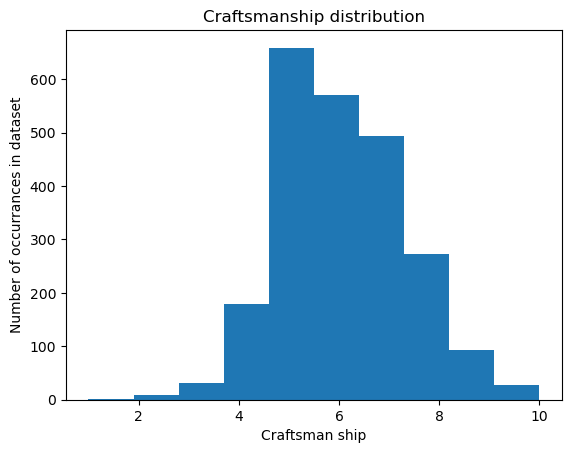

In [22]:
plt.hist(df["Craftsmanship"], bins=10)
plt.title('Craftsmanship distribution')
plt.xlabel('Craftsman ship')
plt.ylabel('Number of occurrances in dataset')
plt.show()

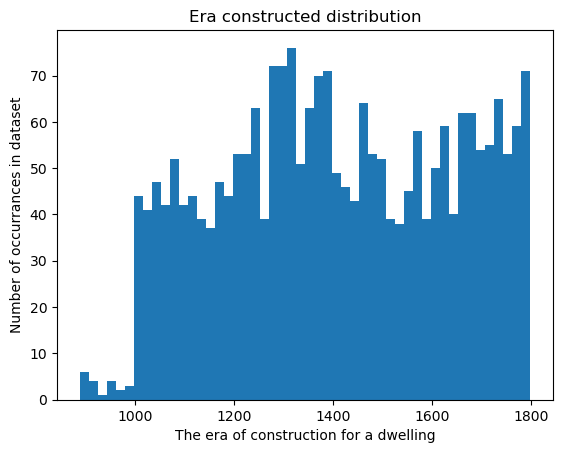

In [23]:
plt.hist(df["EraConstructed"], bins=50)
plt.title('Era constructed distribution')
plt.xlabel('The era of construction for a dwelling')
plt.ylabel('Number of occurrances in dataset')
plt.show()

<Axes: >

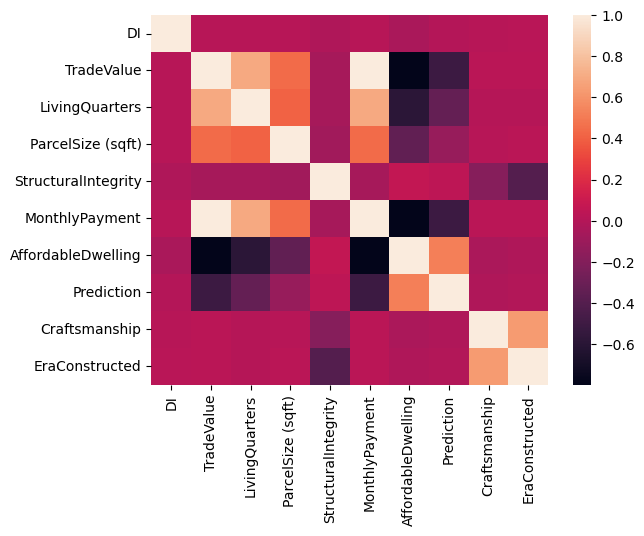

In [24]:
sns.heatmap(df.corr(numeric_only=True, method='spearman'))

### Pairplots saved as pngs

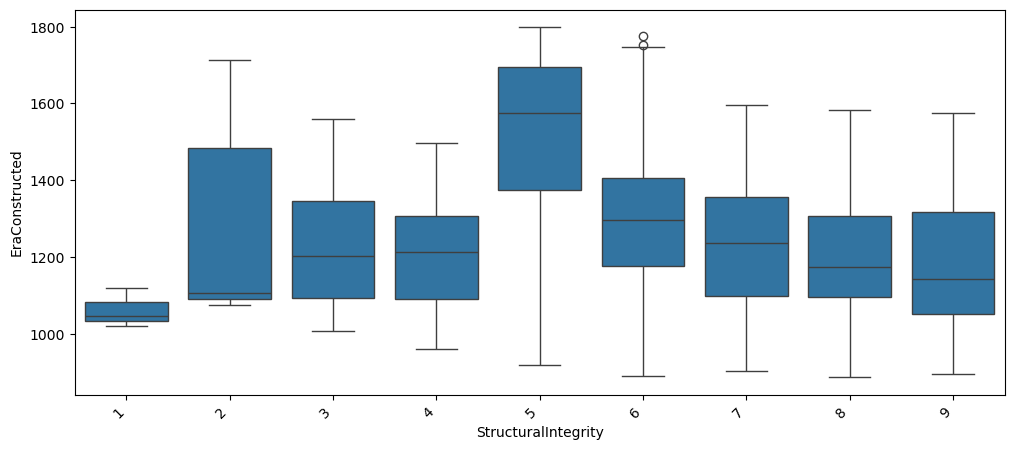

In [25]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="StructuralIntegrity", y="EraConstructed")
plt.xticks(ha='right', rotation=45)
plt.show()

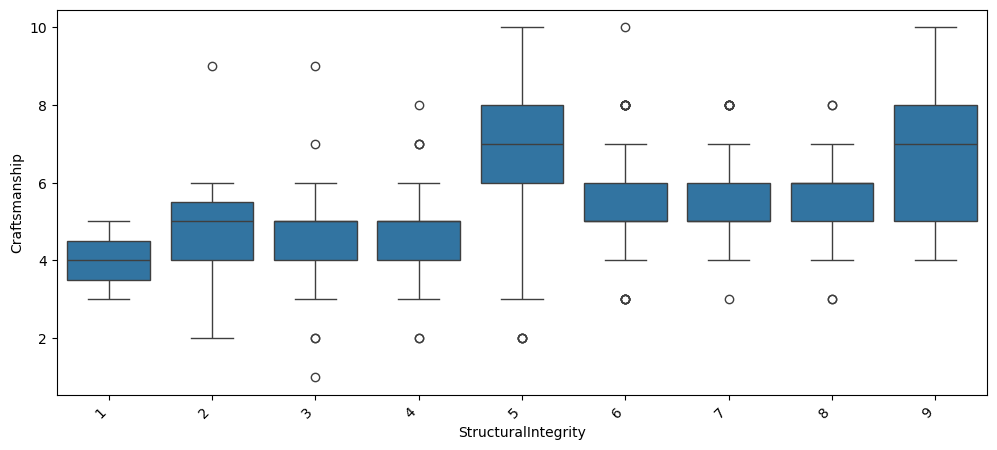

In [26]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="StructuralIntegrity", y="Craftsmanship")
plt.xticks(ha='right', rotation=45)
plt.show()

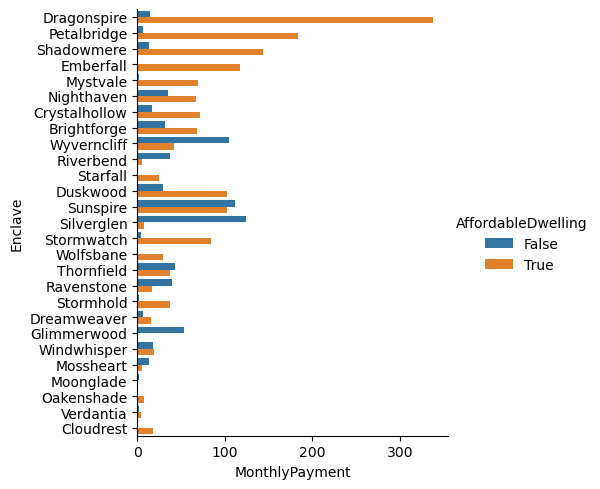

In [27]:
sns.catplot(data=df, kind="bar", x="MonthlyPayment", y="Enclave", 
            hue="AffordableDwelling", errorbar=None, estimator='count')

## 2. Data Preparation

In [28]:
def needs_renovation(row):
    if (row['EraConstructed'] < 1300):
        if (row['StructuralIntegrity'] <= 6):
            return True
        else:
            return False
    else:
        return False

df['NeedsRestoration'] = df.apply(needs_renovation, axis=1)

In [29]:
df.sample(5)

,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling,Prediction,Craftsmanship,EraConstructed,NeedsRestoration
266,266,147000.0,Meadowlands,Shadowmere,859.0,9638.0,5,Gleaming,561.440387,True,1,8,1608,False
1140,1142,179000.0,Meadowlands,Shadowmere,923.0,10800.0,5,Common,683.658703,True,1,5,1088,True
907,908,116500.0,Meadowlands,Stormwatch,659.0,7207.0,5,Common,444.951055,True,1,6,1366,False
1567,1569,184750.0,Meadowlands,Shadowmere,3596.0,40094.0,6,Common,705.619807,True,1,5,1204,True
1428,1430,195000.0,Meadowlands,Sunspire,1498.0,12393.0,6,Common,744.767861,True,1,4,1336,False


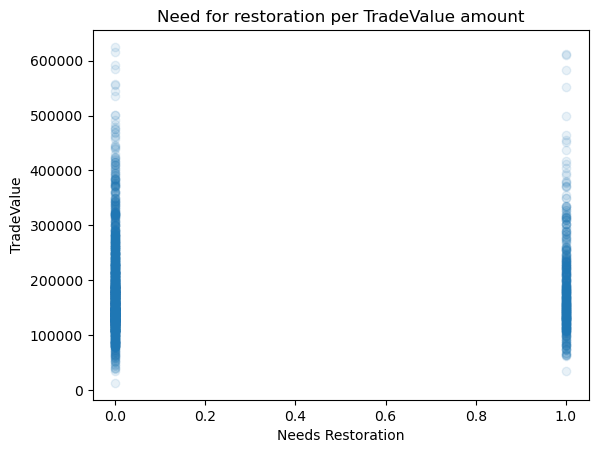

In [30]:
plt.scatter(df['NeedsRestoration'], df['TradeValue'], alpha=0.1)
plt.title('Need for restoration per TradeValue amount')
plt.xlabel('Needs Restoration')
plt.ylabel('TradeValue')
plt.show()

The properties in need of restoration don't have more density towards lower values, but simply have less data points

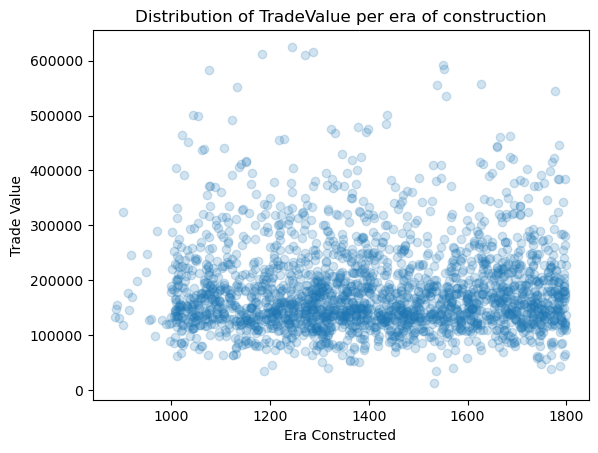

In [31]:
plt.scatter(df['EraConstructed'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of TradeValue per era of construction')
plt.xlabel('Era Constructed')
plt.ylabel('Trade Value')
plt.show()

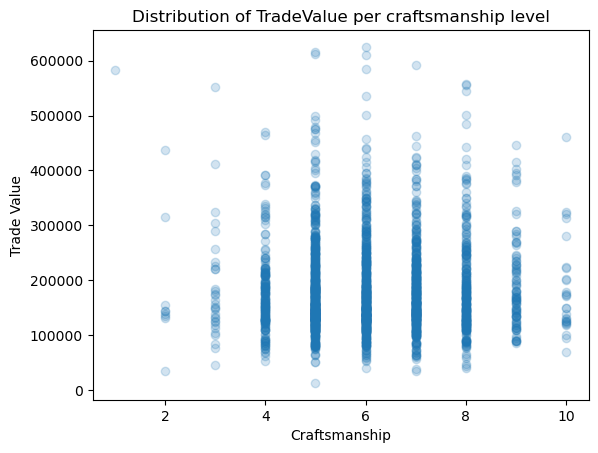

In [32]:
plt.scatter(df['Craftsmanship'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of TradeValue per craftsmanship level')
plt.xlabel('Craftsmanship')
plt.ylabel('Trade Value')
plt.show()

This one also seems to match the craftsmanship histogram for the most part, though appears to have an outlier at the first level of craftsmanship

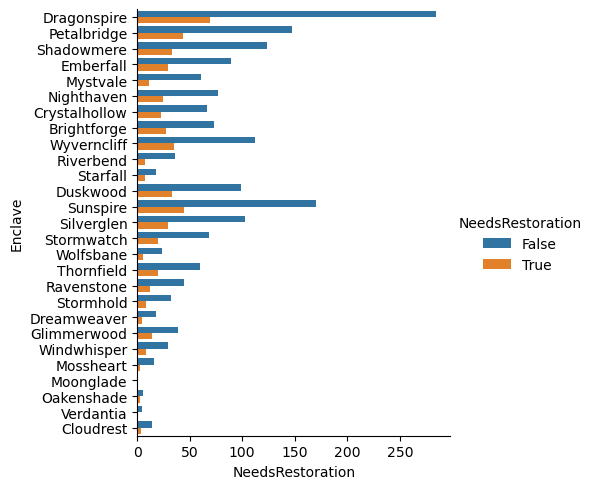

In [33]:
sns.catplot(data=df, kind="bar", x="NeedsRestoration", y="Enclave", 
            hue="NeedsRestoration", errorbar=None, estimator='count')

All enclaves appear to have a (mostly) similar proportion of properties needing and not needing renovations, meaning this metric might not be best to use later on for the decision tree

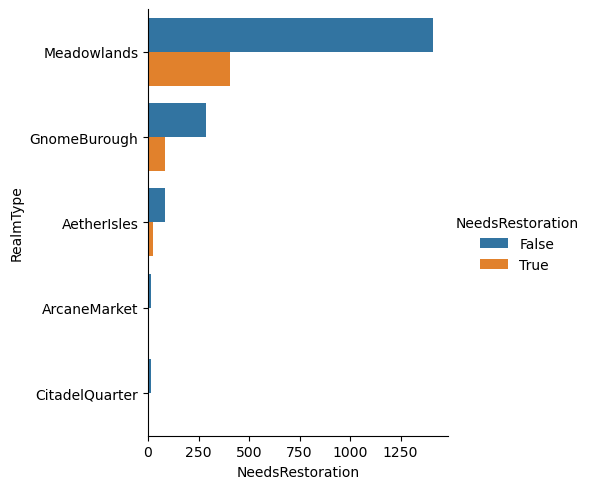

In [34]:
sns.catplot(data=df, kind="bar", x="NeedsRestoration", y="RealmType", 
            hue="NeedsRestoration", errorbar=None, estimator='count')

Same thing as above with the Enclaves, these all seem quite proportional and wouldn't make a great predictor on a decision tree

<Axes: >

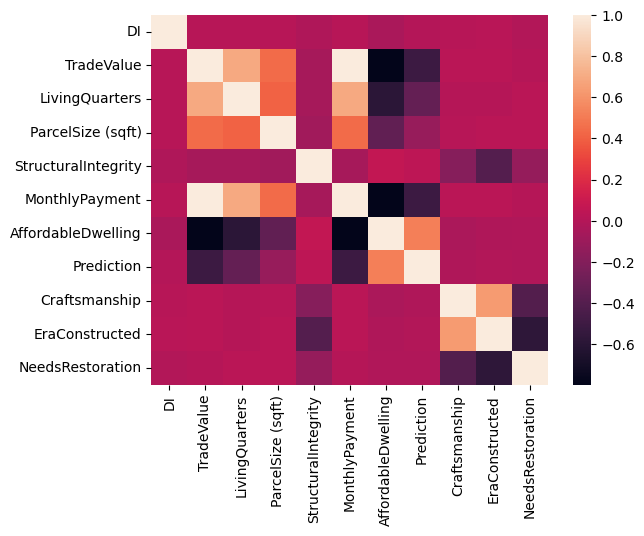

In [35]:
sns.heatmap(df.corr(numeric_only=True, method='spearman'))

Ignoring the columns formed from another (AffordableDwelling and MonthlyPayment when trying to predict TradeValue), from the heatmap we can determine that the new columns for the iteration 3 data set don't seem to have any correlation with TradeValue, so the best picks for the linear regression model are still ParcelSize and LivingQuarters just like in iteration 1.

As for the decision tree, EraConstructed and StructuralIntegrity are, of course, what derives NeedsRestoration, so these would also be invalid choices. Enclaves and RealmType also don't seem to be very good predictors for if a property needs renovation or not either, but with sklearn's decision tree function, maybe we can get a better insight into this while trying to avoid overfitting. The best and most obvious option is using Craftsmanship.

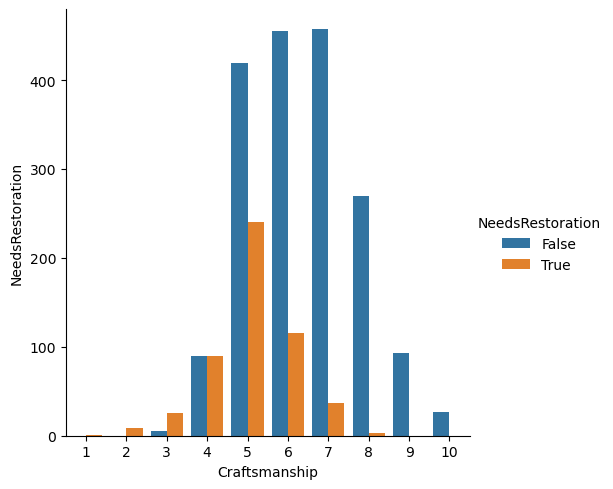

In [36]:
sns.catplot(data=df, kind="bar", x="Craftsmanship", y="NeedsRestoration", 
            hue="NeedsRestoration", errorbar=None, estimator='count')

From the graph we can already imagine some decision nodes for the tree, for example, everything below 4 Craftsmanship being classified as needing renovation.

### For pairplots check the two pngs

## 3. Moddeling and Evaluation

### TradeValue linear regression

In [37]:
features = df[['LivingQuarters', 'ParcelSize (sqft)']]

target = df['TradeValue']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=3)

In [38]:
model = LinearRegression()

In [39]:
model = model.fit(features_train, target_train)

In [40]:
target_pred = model.predict(features_test)

### Evaluation of linear regression

In [41]:
print('Mean Absolute Error:', median_absolute_error(target_test, target_pred))

Mean Absolute Error: 26941.695432503642


In [42]:
# Calculate and print MSE.
mse = mean_squared_error(target_test, target_pred)
print(f"Mean squared error:", mse)


# Calculate and print RMSE.
rmse = mse ** 0.5
print(f"Root mean squared error:", rmse)

Mean squared error: 3395598836.9544196
Root mean squared error: 58271.76706565899


In [43]:
r2 = r2_score(target_test, target_pred)
print(f"R-squared:", r2)

R-squared: 0.4127225618342012


### NeedsRestoration classification model

In [44]:
features = df[['Craftsmanship', 'TradeValue']]

target = df['NeedsRestoration']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.30, random_state=3)

Since we need more than one feature, we chose TradeValue pretty arbitrarily since it shouldn't affect the results of the tree, which will rely more heavily on Craftsmanship, the one with an actual correlation with the target.
Another option would have been to use binning on, for example, Enclaves; though, as we had explored earlier, these don't really correlate with NeedsRestoration either, so, to make the model simpler for almost the same accuracy, we decided to stick with a filler column (TradeValue) since we want Craftsmanship, the one column that actually correlates with NeedsRestoration, to be the sole factor in the making of the tree. This can also avoid overfitting.

In [45]:
tree = DecisionTreeClassifier(max_depth=2)

In [46]:
tree = tree.fit(features_train, target_train)

In [47]:
target_prediction = tree.predict(features_test)

In [48]:
from sklearn.tree import plot_tree

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.5\ngini = 0.343\nsamples = 1636\nvalue = [1277, 359]'),
 Text(0.25, 0.5, 'x[0] <= 4.5\ngini = 0.485\nsamples = 607\nvalue = [356, 251]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.497\nsamples = 157\nvalue = [72, 85]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.466\nsamples = 450\nvalue = [284, 166]'),
 Text(0.75, 0.5, 'x[0] <= 6.5\ngini = 0.188\nsamples = 1029\nvalue = [921, 108]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.308\nsamples = 405\nvalue = [328, 77]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.094\nsamples = 624\nvalue = [593.0, 31.0]')]

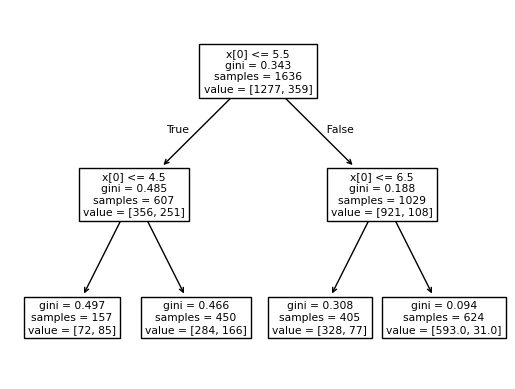

In [49]:
plot_tree(tree)

As expected, the tree formed predicts solely using the Craftsmanship column, the column correlated with NeedsRestoration the most. And TradeValue, since it was picked arbitrarily since there weren't any other correlating columns, didn't have an effect on the prediction, as intended.

### 4.2 Evaluation of classification model

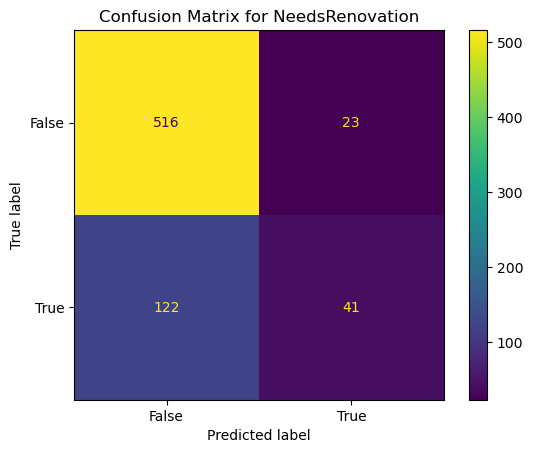

In [50]:
cm = confusion_matrix(target_test, target_prediction)
labels = ['False','True']
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title('Confusion Matrix for NeedsRenovation')
plt.show()

We can see from the matrix that the model correctly predicted 41 properties as needing renovation and 516 as not needing. The model also wrongly predicted 23 properties not needing renovation as needing it, and 122 that needed renovation as not needing it.

In [51]:
print('Accuracy:', accuracy_score(target_test, target_prediction))

Accuracy: 0.7934472934472935


In [52]:
print("F1 score: ", f1_score(target_test, target_prediction))

F1 score:  0.36123348017621143


This converts the final dataset results into a csv file.

In [53]:
df.to_csv('set15_it3_final.csv')